In [1]:
import numpy as np
import matplotlib.pyplot as plt
import slugger as slug
import pandas as pd
import matplotlib.ticker as ticker


params = {'text.usetex': False, 'mathtext.fontset': 'stix'}
plt.rcParams.update(params)
%matplotlib inline

In [2]:
bad_gp2_sf3 = pd.read_csv('./s1_gpweno5_sf3.csv', index_col=0)
bad_gp2_sf4 = pd.read_csv('./s1_gpweno5_sf4.csv', index_col=0)

good_gp2_sf3 = pd.read_csv('./s03_gpweno5_sf3.csv', index_col=0)
good_gp2_sf4 = pd.read_csv('./s03_gpweno5_sf4.csv', index_col=0)

NN = np.array(bad_gp2_sf3.index)

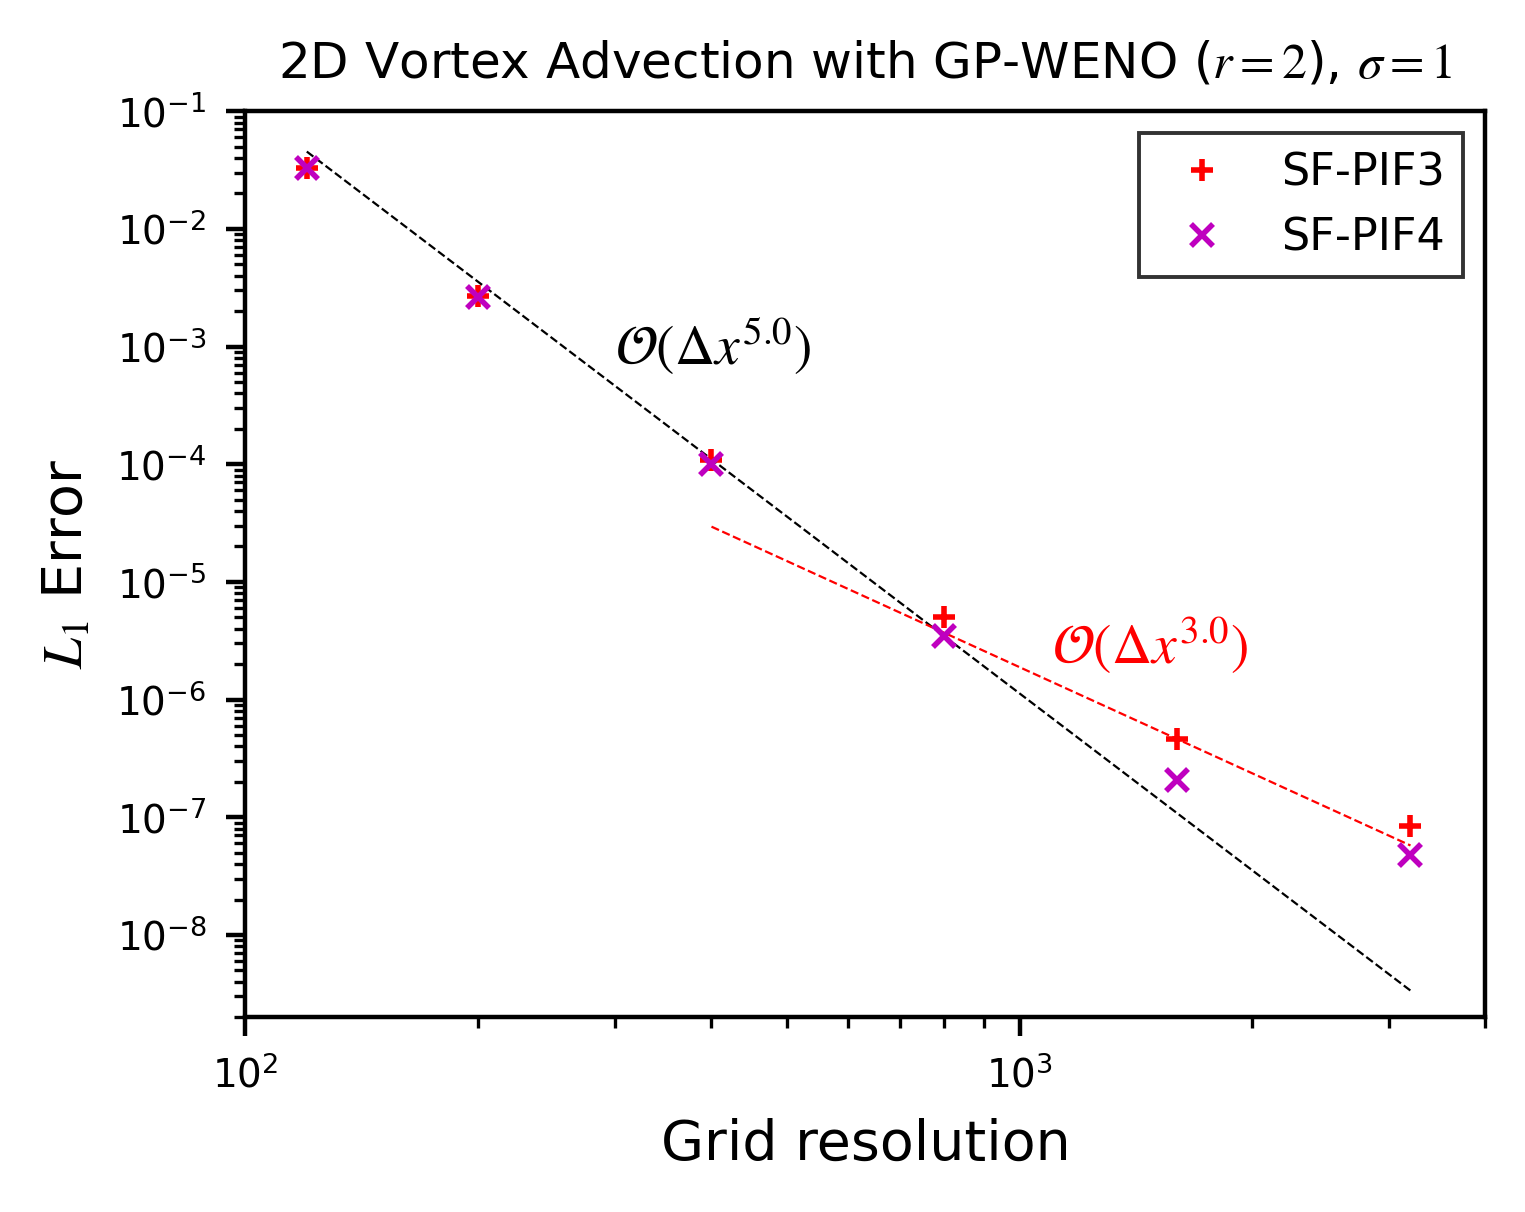

In [20]:
fig = plt.figure(figsize=(4,3), dpi=400)
ax = fig.add_subplot(1,1,1)

a = np.float64(bad_gp2_sf4.index[3])
b = bad_gp2_sf4["dens"][a]

a2 = np.float64(bad_gp2_sf3.index[4])
b2 = bad_gp2_sf3["dens"][a2]

# 4.5 order
line_order = 5.0
ax.plot(NN, (b*a**line_order)*(NN)**(-line_order), 'k--', linewidth=0.4)
ax.annotate(r'$\mathcal{{O}} (\Delta x^{{{}}})$'.format(line_order), xy=(3.E2,7.E-4))

# 3 order
line_order2 = 3.0
ax.plot(NN[2:], (b2*a2**line_order2)*(NN[2:])**(-line_order2), 'r--', linewidth=0.4)
ax.annotate(r'$\mathcal{{O}} (\Delta x^{{{}}})$'.format(line_order2), xy=(1.1E3,2.E-6), color='r')

ax.plot(bad_gp2_sf3['dens'], 'r+', markersize=4, linewidth=0.5, label='SF-PIF3')

ax.plot(bad_gp2_sf4['dens'], 'mx', markersize=4, linewidth=0.5, label='SF-PIF4')




ax.loglog()

ax.set_xlim(1.E2, 4.E3)
ax.set_ylim(2.E-9, 1.E-1)

legend = ax.legend(fontsize=8, numpoints=1, fancybox=False, edgecolor='k')
legend.get_frame().set_linewidth(.7)

ax.tick_params(axis='both', which='both', labelsize=7)
ax.set_title('2D Vortex Advection with GP-WENO ($r=2$), $\sigma=1$', fontsize=9)

ax.set_xlabel('Grid resolution')
ax.set_ylabel(r'$L_1$' + ' Error')



fig.savefig('./gp2_vortex_error_sigma1.pdf', bbox_inches='tight', pad_inches=0.05)

# The good one, sigma=0.3

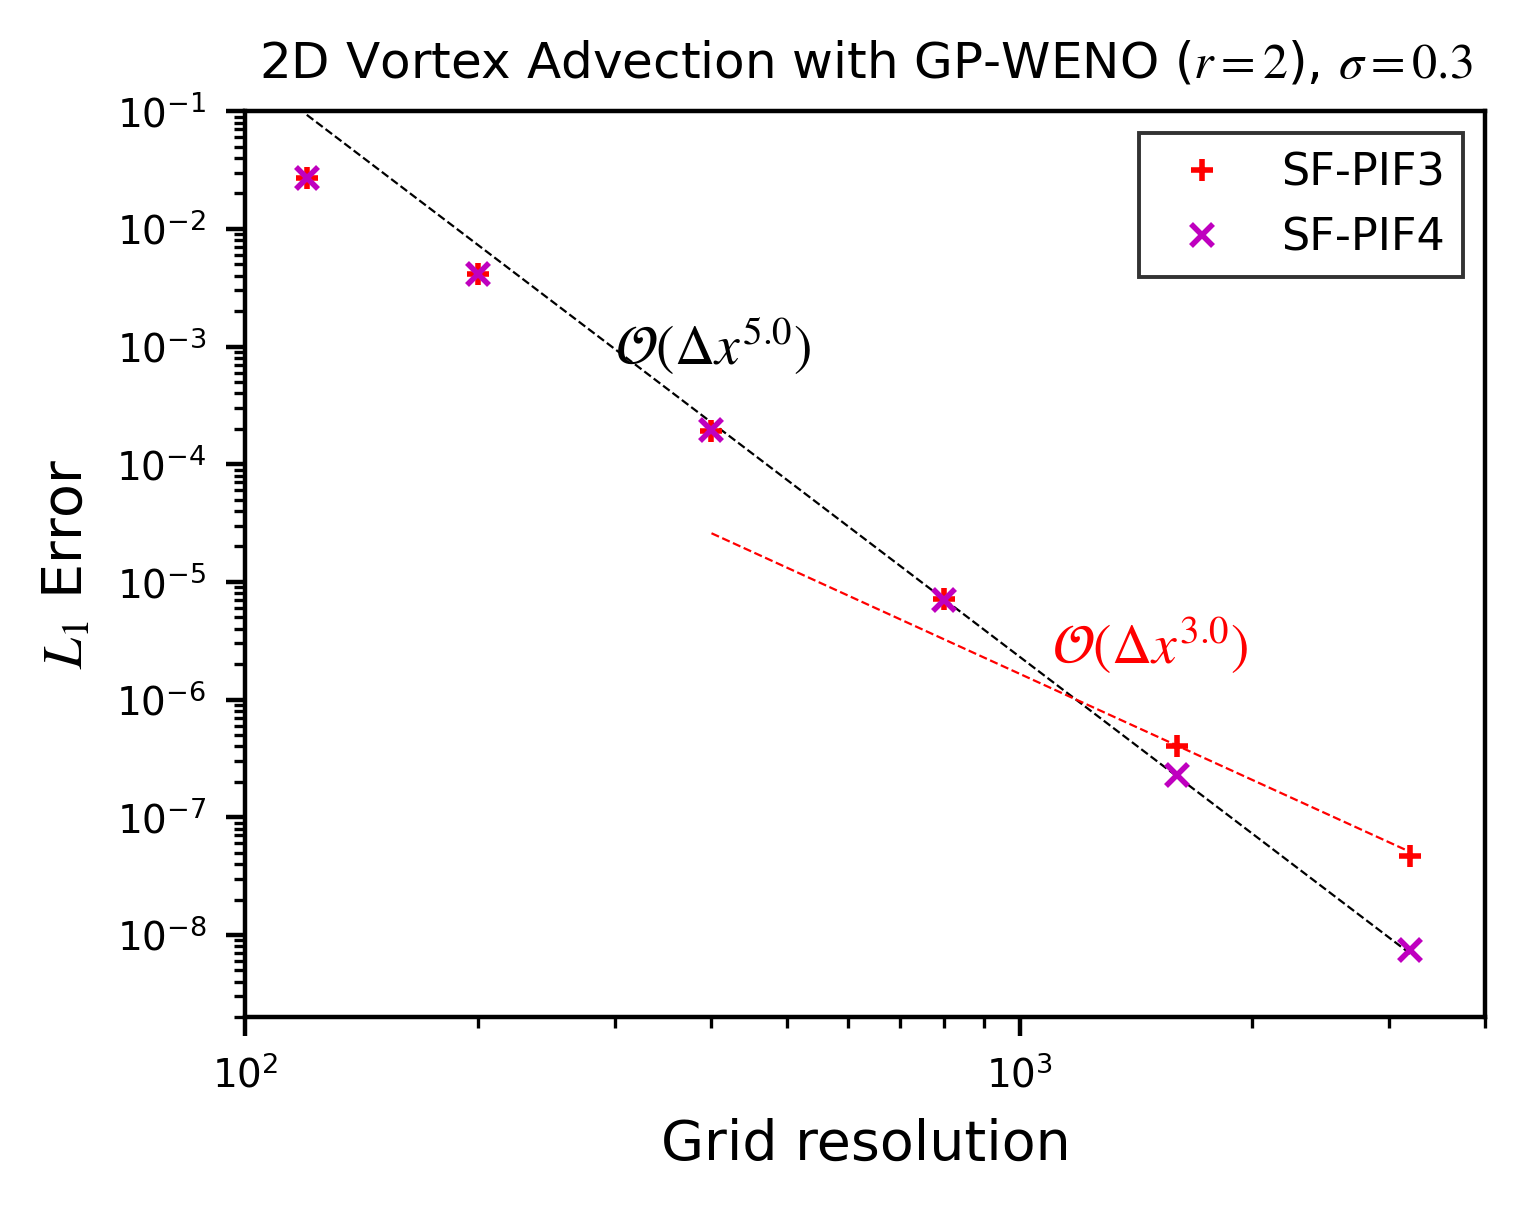

In [21]:
fig = plt.figure(figsize=(4,3), dpi=400)
ax = fig.add_subplot(1,1,1)

a = np.float64(good_gp2_sf4.index[3])
b = good_gp2_sf4["dens"][a]

a2 = np.float64(good_gp2_sf3.index[4])
b2 = good_gp2_sf3["dens"][a2]

# 4.5 order
line_order = 5.0
ax.plot(NN, (b*a**line_order)*(NN)**(-line_order), 'k--', linewidth=0.4)
ax.annotate(r'$\mathcal{{O}} (\Delta x^{{{}}})$'.format(line_order), xy=(3.E2,7.E-4))

# 3 order
line_order2 = 3.0
ax.plot(NN[2:], (b2*a2**line_order2)*(NN[2:])**(-line_order2), 'r--', linewidth=0.4)
ax.annotate(r'$\mathcal{{O}} (\Delta x^{{{}}})$'.format(line_order2), xy=(1.1E3,2.E-6), color='r')

ax.plot(good_gp2_sf3['dens'], 'r+', markersize=4, linewidth=0.5, label='SF-PIF3')

ax.plot(good_gp2_sf4['dens'], 'mx', markersize=4, linewidth=0.5, label='SF-PIF4')




ax.loglog()

ax.set_xlim(1.E2, 4.E3)
ax.set_ylim(2.E-9, 1.E-1)

legend = ax.legend(fontsize=8, numpoints=1, fancybox=False, edgecolor='k')
legend.get_frame().set_linewidth(.7)

ax.tick_params(axis='both', which='both', labelsize=7)
ax.set_title('2D Vortex Advection with GP-WENO ($r=2$), $\sigma=0.3$', fontsize=9)

ax.set_xlabel('Grid resolution')
ax.set_ylabel(r'$L_1$' + ' Error')



fig.savefig('./gp2_vortex_error_sigma03.pdf', bbox_inches='tight', pad_inches=0.05)

Text(0, 0.5, '$L_1$ Error')

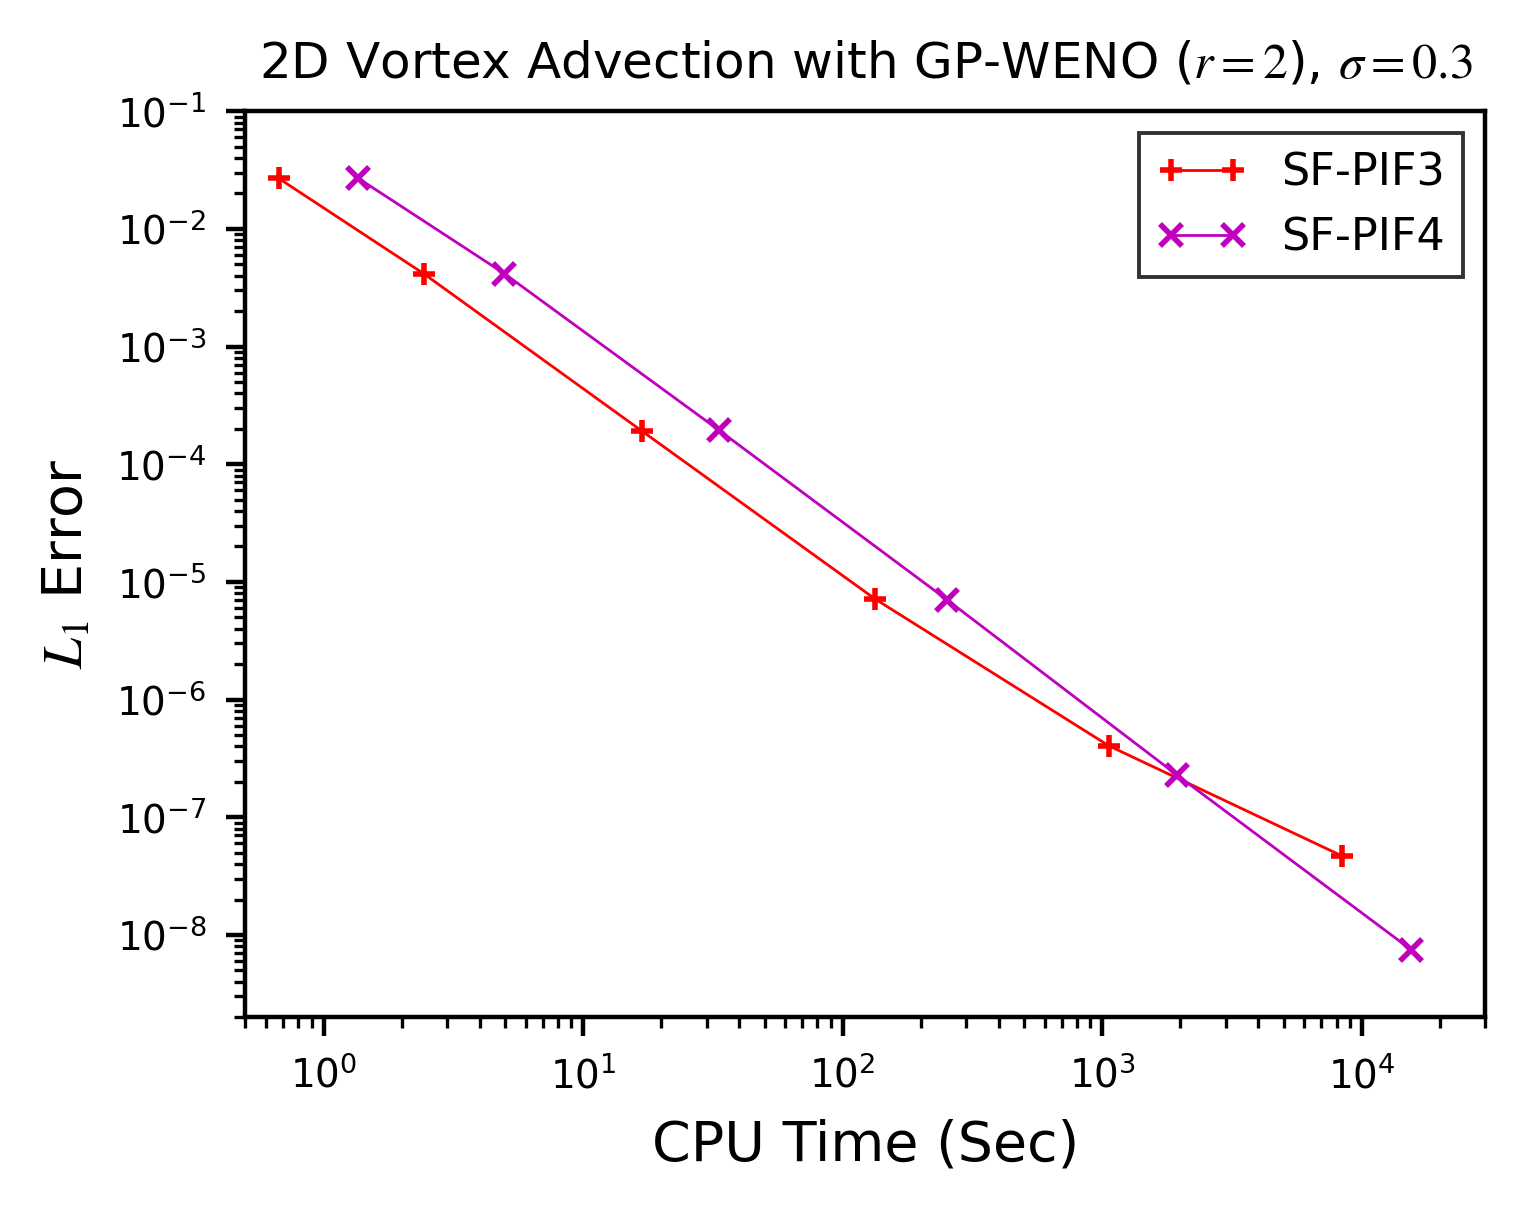

In [27]:
fig = plt.figure(figsize=(4,3), dpi=400)
ax = fig.add_subplot(1,1,1)

ax.plot(good_gp2_sf3['eTime'], good_gp2_sf3['dens'], 'r+-', markersize=4, linewidth=0.5, label='SF-PIF3')

ax.plot(good_gp2_sf4['eTime'], good_gp2_sf4['dens'], 'mx-', markersize=4, linewidth=0.5, label='SF-PIF4')






ax.loglog()

ax.set_xlim(0.5, 3.E4)
ax.set_ylim(2.E-9, 1.E-1)

legend = ax.legend(fontsize=8, numpoints=2, fancybox=False, edgecolor='k')
legend.get_frame().set_linewidth(.7)

ax.tick_params(axis='both', which='both', labelsize=7)
ax.set_title('2D Vortex Advection with GP-WENO ($r=2$), $\sigma=0.3$', fontsize=9)

# # modify xticks
# ax.set_xticks([1., 10., sf3_tTime, rk3_tTime, 1000.])
# ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))


ax.set_xlabel('CPU Time (Sec)')
ax.set_ylabel(r'$L_1$' + ' Error')


# fig.savefig('./gp2_vortex_time_fourth.pdf', bbox_inches='tight', pad_inches=0)

In [42]:
weno_rk4_time = np.array([2.50, 10.42, 78.47, 641.50, 5115.47, 40195.034])
weno_rk3_time = np.array([1.50, 6.17, 45.44, 372.47, 2957.26, 23274.37])
weno_sf4_time = np.array([1.47, 5.33, 35.89, 270.94, 2091.20, 16337.73])
weno_sf3_time = np.array([0.71, 2.77, 19.89, 153.92, 1203.10, 9404.65])

In [43]:
rk4_time

array([2.5000000e+00, 1.0420000e+01, 7.8470000e+01, 6.4150000e+02,
       5.1154700e+03, 4.0195034e+04])

In [44]:
good_gp2_sf3

,dens,velx,vely,pres,eTime,order
120,2.680682e-02,1.320597e-01,1.397564e-01,4.274589e-02,0.672097,NaN
200,4.160830e-03,2.079628e-02,2.101637e-02,6.357527e-03,2.430750,3.646923
400,1.912020e-04,1.289095e-03,1.286516e-03,3.212135e-04,16.863448,4.443702
800,7.123951e-06,4.995165e-05,4.944126e-05,1.157214e-05,133.790415,4.746276
1600,4.048385e-07,1.745642e-06,1.683695e-06,5.270921e-07,1061.264547,4.137259
3200,4.705627e-08,1.042427e-07,9.179510e-08,5.762629e-08,8375.052295,3.104887


In [45]:
good_gp2_sf3.eTime/weno_sf3_time

120     0.946616
200     0.877527
400     0.847835
800     0.869220
1600    0.882108
3200    0.890522
Name: eTime, dtype: float64

In [46]:
good_gp2_sf4

,dens,velx,vely,pres,eTime,order
120,2.699940e-02,1.320598e-01,1.399289e-01,4.312266e-02,1.357401,NaN
200,4.166616e-03,2.081326e-02,2.106479e-02,6.388899e-03,4.971970,3.658216
400,1.944032e-04,1.294524e-03,1.295715e-03,3.274984e-04,33.393680,4.421752
800,7.069643e-06,4.993647e-05,4.999509e-05,1.192277e-05,252.079635,4.781271
1600,2.281095e-07,1.610954e-06,1.613341e-06,3.850455e-07,1944.680035,4.953839
3200,7.483231e-09,5.075891e-08,5.080864e-08,1.241898e-08,15514.252286,4.929922


In [48]:
good_gp2_sf4.eTime/weno_sf4_time

120     0.923402
200     0.932827
400     0.930445
800     0.930389
1600    0.929935
3200    0.949597
Name: eTime, dtype: float64